In [1]:
import datetime
import numpy as np
import pandas as pd 
import dask.dataframe as dd
import os
import itertools
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
diretorio = "/media/hdvm03/bd/007/002/007/002"

print("csv_1987_2012")
csv_1987_2012 = dd.read_csv(f'{diretorio}/geral/01_dados_1987_2012.csv', on_bad_lines='skip', low_memory=False)

print("csv_2013_2021")
csv_2013_2020 = dd.read_csv(f'{diretorio}/geral/01_dados_2013_2020.csv', on_bad_lines='skip', low_memory=False)

csv_1987_2012
csv_2013_2021


In [14]:
csv_1987_sem_corespondente = ["DocumentoOrientador_2", "Orientador_2", "DocumentoOrientador_4", "Orientador_4", "DocumentoCoOrientador_1", "CoOrientador_1", "DocumentoCoOrientador_2", "CoOrientador_2", "DocumentoCoOrientador_3", "CoOrientador_3", "DocumentoCoOrientador_4", "CoOrientador_4"]
csv_2013_sem_corespondente = ["CD_SUBAREA_CONHECIMENTO", "NM_SUBAREA_CONHECIMENTO", "ID_AREA_CONCENTRACAO", "NM_AREA_CONCENTRACAO", "DS_PALAVRA_CHAVE", "DS_ABSTRACT", "ID_ADD_PRODUCAO_INTELECTUAL", "ID_PRODUCAO_INTELECTUAL", "ID_SUBTIPO_PRODUCAO", "NM_SUBTIPO_PRODUCAO", "ID_LINHA_PESQUISA", "ID_PROJETO", "NM_PROJETO", "DH_INICIO_AREA_CONC", "DH_FIM_AREA_CONC", "DH_INICIO_LINHA", "DH_FIM_LINHA", "NM_EXPECTATIVA_ATUACAO", "IN_TRABALHO_MESMA_AREA", "IN_ORIENT_PARTICIPOU_BANCA", "CD_ESPECIALIDADE", "NM_ESPECIALIDADE", "ID_TP_EXPECTATIVA_ATUACAO", "DT_MATRICULA", "ID_GRAU_ACADEMICO", "NM_GRAU_ACADEMICO", "DS_CATEGORIA_ORIENTADOR", "NM_CATEGORIA_DOCENTE", "IN_TCC_COM_VINCULO_PRODUCAO", "ID_ADD_PRODUCAO_VINCULO_CT"]

data = csv_1987_2012.iloc[0]["DataDefesa"]
print(type(data))
data 

#csv_1987_2012.info()

# csv_1987_2012["DataDefesa"] = csv_1987_2012.to_datetime(csv_1987_2012["DataDefesa"])

capes_teses = csv_1987_2012["DataDefesa"]
capes_teses2 = csv_2013_2020["DT_TITULACAO"]
capes_teses2.to_csv(f'{diretorio}/geral/datadefesa_teste2.csv',index=False)



<class 'str'>


In [58]:
csv_1987 = ["AnoBase","DataDefesa", "TituloTese", "GrandeAreaDescricao", "AreaConhecimento", "AreaAvaliacao", "Nivel", "ResumoTese", "LinhaPesquisa", "Regiao", "Uf", "SiglaIes", "NomeIes", "Autor", "DocumentoDiscente", "NumeroPaginas", "BibliotecaDepositaria", "Idioma", "URLTextoCompleto", "DocumentoOrientador_1", "Orientador_1"]
csv_2013 = ["AN_BASE", "DT_TITULACAO","NM_PRODUCAO", "NM_GRANDE_AREA_CONHECIMENTO", "NM_AREA_CONHECIMENTO", "NM_AREA_AVALIACAO", "NM_TP_VINCULO", "DS_RESUMO", "NM_LINHA_PESQUISA", "NM_REGIAO", "SG_UF_IES", "SG_ENTIDADE_ENSINO", "NM_ENTIDADE_ENSINO", "NM_DISCENTE", "ID_PESSOA_DISCENTE", "NR_PAGINAS", "DS_BIBLIOTECA_DEPOSITARIA", "NM_IDIOMA", "DS_URL_TEXTO_COMPLETO", "ID_PESSOA_ORIENTADOR", "NM_ORIENTADOR"]
# volume e palavra-chaves não incluidos
#  arera de concentração e subareaconcentração somente a partir de 2013

dict1 = {"JAN": "/01/", "FEB": "/02/", "MAR": "/03/", "APR": "/04/", "MAR": "/05/", "JUN": "/06/", "JUL": "/07/","AUG": "/08/","SEP": "/09/","OCT": "/10/", "NOV":"/11/", "DEC":"/12/"}
dict2 = {"jan" : "01", "fev":"02", "mar":"03", "abr":"04", "mai":"05", "jun":"06", "jul":"07","ago":"08", "set":"09", "out":"10", "nov":"11", "dez":"12"}
meses = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL","AUG","SEP","OCT", "NOV", "DEC"]
meses2 = ["jan", "fev", "mar", "abr", "mai", "jun", "jul","ago", "set", "out", "nov", "dez"]

df = pd.read_csv(f'{diretorio}/geral/datadefesa_teste2.csv')
df1 = pd.read_csv(f'{diretorio}/geral/datadefesa_teste1.csv')

for i in df.index:
    data = df.at[i,"DataDefesa"]
    


# for i in df.index:
#     data = df.at[i,"DT_TITULACAO"]
#     for mes in meses:
#         if mes in data:
#             df.at[i,"DT_TITULACAO"] = data[0:2]+dict1[mes]+data[5:9]+" 00:00:00"

    
df.to_csv(f'{diretorio}/geral/datadefesa_teste4.csv', index=False) 



In [4]:
csv_2013_2020["NM_GRANDE_AREA_CONHECIMENTO"].unique()

array(['ENGENHARIAS', 'CIÊNCIAS DA SAÚDE', 'MULTIDISCIPLINAR',
       'CIÊNCIAS BIOLÓGICAS', 'LINGÜÍSTICA, LETRAS E ARTES',
       'CIÊNCIAS EXATAS E DA TERRA', 'CIÊNCIAS AGRÁRIAS',
       'CIÊNCIAS HUMANAS', 'CIÊNCIAS SOCIAIS APLICADAS', nan],
      dtype=object)

In [5]:
teses = pd.merge(csv_1987_2012, csv_2013_2020, 
                    left_on=  csv_1987,
                    right_on= csv_2013, 
                    how = 'right')
teses

NameError: name 'csv_1987' is not defined

In [6]:
grande_area = csv_2013_2020["NM_GRANDE_AREA_CONHECIMENTO"]
grande_area.unique().tolist()
# grande_area.value_counts()

['ENGENHARIAS',
 'CIÊNCIAS DA SAÚDE',
 'MULTIDISCIPLINAR',
 'CIÊNCIAS BIOLÓGICAS',
 'LINGÜÍSTICA, LETRAS E ARTES',
 'CIÊNCIAS EXATAS E DA TERRA',
 'CIÊNCIAS AGRÁRIAS',
 'CIÊNCIAS HUMANAS',
 'CIÊNCIAS SOCIAIS APLICADAS',
 nan]

In [9]:
area_conheci = csv_2013_2020["NM_AREA_CONHECIMENTO"]
area_conheci.value_counts()
quant_area_conheci = area_conheci.unique()
len(quant_area_conheci)

82

In [9]:
sub_area_conheci = csv_2013_2020["NM_SUBAREA_CONHECIMENTO"]
sub_area_conheci.unique()
sub_area_conheci.value_counts()

NÃO INFORMADO                      266534
NÃO SE APLICA                      225857
CLÍNICA MÉDICA                      18703
SOCIAIS E HUMANIDADES               16739
ENSINO DE CIÊNCIAS E MATEMÁTICA     10161
                                    ...  
GENÉTICA HUMANA E MÉDICA               11
SISTEMAS ELÉTRICOS DE POTÊNCIA          4
METALURGIA DE TRANSFORMAÇÃO             2
BOTÂNICA APLICADA                       1
ECONOMIA MONETÁRIA E FISCAL             1
Name: NM_SUBAREA_CONHECIMENTO, Length: 156, dtype: int64

In [10]:
area_concentra = csv_2013_2020["NM_AREA_CONCENTRACAO"]
area_concentra.unique()
area_concentra.value_counts()


EDUCAÇÃO                                                            21091
NÃO INFORMADO                                                       15125
PRODUÇÃO VEGETAL                                                     5870
QUÍMICA                                                              5384
CIÊNCIA DA COMPUTAÇÃO                                                5236
                                                                    ...  
DIREITO ECONÔMICO E SOCIAL                                              1
EPISTEMOLOGIA E HISTÓRIA DA FÍSICA NA EDUCAÇÃO BÁSICA E SUPERIOR        1
BIOINFORMÁTICA E BIOLOGIA DE SISTEMAS                                   1
HISTÓRIA PÚBLICA                                                        1
MANEJO E  CONSERVAÇÃO DO SOLO E DA ÁGUA                                 1
Name: NM_AREA_CONCENTRACAO, Length: 4834, dtype: int64

In [11]:
area_avalia = csv_2013_2020["NM_AREA_AVALIACAO"]
area_avalia.unique()

array(['ENGENHARIAS I', 'MEDICINA II', 'INTERDISCIPLINAR', 'MEDICINA I',
       'CIÊNCIAS BIOLÓGICAS I', 'LETRAS / LINGUÍSTICA', 'BIODIVERSIDADE',
       'CIÊNCIA DA COMPUTAÇÃO', 'CIÊNCIAS AGRÁRIAS I',
       'ANTROPOLOGIA / ARQUEOLOGIA', 'ENGENHARIAS IV', 'ENGENHARIAS II',
       'MEDICINA VETERINÁRIA', 'CIÊNCIAS SOCIAIS APLICADAS I', 'EDUCAÇÃO',
       'QUÍMICA', 'NUTRIÇÃO', 'CIÊNCIAS AMBIENTAIS',
       'MATEMÁTICA / PROBABILIDADE E ESTATÍSTICA', 'ENGENHARIAS III',
       'ZOOTECNIA / RECURSOS PESQUEIROS', 'ENSINO', 'ODONTOLOGIA',
       'ARTES / MÚSICA', 'GEOCIÊNCIAS', 'ASTRONOMIA / FÍSICA',
       'ADMINISTRAÇÃO, CIÊNCIAS CONTÁBEIS E TURISMO', 'SAÚDE COLETIVA',
       'FARMÁCIA', 'FILOSOFIA/TEOLOGIA:SUBCOMISSÃO FILOSOFIA',
       'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS', 'SOCIOLOGIA',
       'DIREITO', 'FILOSOFIA/TEOLOGIA:SUBCOMISSÃO TEOLOGIA', 'PSICOLOGIA',
       'ECONOMIA', 'GEOGRAFIA', 'HISTÓRIA', 'MEDICINA III',
       'PLANEJAMENTO URBANO E REGIONAL / DEMOGRAFIA', 'SERVI

In [10]:
busca1 = csv_1987_2012[csv_1987_2012["TituloTese"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano1 = busca1["TituloTese"].groupby(busca1["AnoBase"])
busca_por_ano1 = agrupar_por_ano1.count()
quant_termos1 = busca_por_ano1.values.tolist()
anos1 = busca_por_ano1.index.tolist()

In [23]:
busca1b = csv_1987_2012[csv_1987_2012["TituloTese"].str.contains("mercosul|mercosur", case=False, na=False)]
agrupar_por_ano1b = busca1["TituloTese"].groupby(busca1["DataDefesa"])
busca_por_ano1b = agrupar_por_ano1.count()
quant_termos1b = busca_por_ano1.values.tolist()
anos1b = busca_por_ano1.index.tolist()

In [11]:

busca4= csv_2013_2020[csv_2013_2020["NM_PRODUCAO"].str.contains("bolsonaro", case=False, na=False)]
agrupar_por_ano4 = busca4["NM_PRODUCAO"].groupby(busca4["AN_BASE"])
busca_por_ano4 = agrupar_por_ano4.count()
quant_termos4 = busca_por_ano4.values.tolist()
anos4 = busca_por_ano4.index.tolist()



In [24]:

busca4b= csv_2013_2020[csv_2013_2020["NM_PRODUCAO"].str.contains("bolsonaro", case=False, na=False)]
agrupar_por_ano4 = busca4["NM_PRODUCAO"].groupby(busca4["DT_TITULACAO"])
busca_por_ano4 = agrupar_por_ano4.count()
quant_termos4 = busca_por_ano4.values.tolist()
anos4 = busca_por_ano4.index.tolist()

<AxesSubplot:xlabel='AN_BASE'>

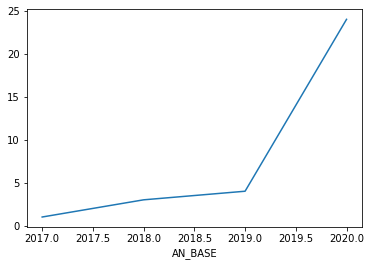

In [12]:
fig_pandas = busca_por_ano4.plot(kind="line", x=anos4, y=quant_termos4)
fig_pandas

In [13]:
fig = px.line(x=anos1, y=quant_termos1, markers="O")

fig.show()
# colocar linha de produção da grande área

In [16]:
fig = px.line(x=anos4, y=quant_termos4, markers="O")

fig.show()

In [21]:
anos_total = list(range(1992,2021))
print(f'Lista de anos: {anos_total}')
print(f'1992-2012: {quant_termos1}')
print(f'2013-2020: {quant_termos4}')

quant_termos5 = quant_termos1 + quant_termos4
print(f'1992-2020: {quant_termos5}')

Lista de anos: [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
1992-2012: [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46]
2013-2020: [1, 3, 4, 24]
1992-2020: [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46, 1, 3, 4, 24]


In [22]:
fig = px.line(x=anos_total, y=quant_termos5, markers="O", title="Termo Mercosul por ano")

fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 25, whereas the length of  previously-processed arguments ['x'] is 29

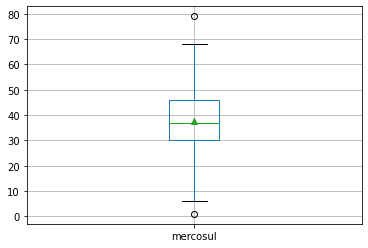

In [12]:
teses_boxplot = pd.DataFrame({"mercosul": quant_termos5})

boxplot = teses_boxplot.boxplot(column="mercosul", showmeans=True)

In [43]:
teses = [anos_total, quant_termos5]
teses_1992_2020 = pd.DataFrame(quant_termos5, anos_total)
teses_total = teses_1992_2020.T


ValueError: Shape of passed values is (25, 1), indices imply (29, 1)

In [47]:
lista_anos = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

quant_termos_final = [1, 6, 8, 16, 31, 16, 36, 59, 65, 79, 66, 68, 46, 44, 48, 26, 37, 40, 47, 34, 46, 30, 34, 43, 38, 36, 42, 33, 22]

fig = px.line(x=lista_anos, y=quant_termos_final, markers="O", title="Termo Mercosul por ano")

fig.show()

In [51]:
# grande area conhecimento- 1987 a 2012
busca_gac =csv_1987_2012["GrandeAreaDescricao"].count()
busca_gac

busca_gac1 = csv_1987_2012[csv_1987_2012["GrandeAreaDescricao"].str.contains("ciências humanas|ciências sociais aplicadas", case=False, na=False)]
agrupar_busca_gac1 = busca_gac1["GrandeAreaDescricao"].groupby(busca_gac1["AnoBase"])
contagem_gac1 = agrupar_busca_gac1.count()
quant_gac1 = contagem_gac1.tolist()

# grande area conhecimento- 2013_2020
busca_gac =csv_2013_2020["NM_GRANDE_AREA_CONHECIMENTO"].count()
busca_gac

busca_gac1 = csv_2013_2020[csv_2013_2020["NM_GRANDE_AREA_CONHECIMENTO"].str.contains("ciências humanas|ciências sociais aplicadas", case=False, na=False)]
agrupar_busca_gac1 = busca_gac1["NM_GRANDE_AREA_CONHECIMENTO"].groupby(busca_gac1["AN_BASE"])
contagem_gac2 = agrupar_busca_gac1.count()
quant_gac2 = contagem_gac2.tolist() 

anos_total = list(range(1987,2021))
quant_gac_geral = quant_gac1 + quant_gac2

print(len(anos_total))
print(len(quant_gac_geral))

fig = px.line(x=anos_total, y=quant_gac_geral, markers="O", title="Grande área")

fig.show()

34
34
